# Import data and moduls

In [171]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [172]:
#取消python警告
import warnings
warnings.filterwarnings('ignore')

# 將csv載入

In [173]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv('submission.csv')

In [174]:
train.head(5)

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種,type
0,1,5.4,3.7,1.5,0.2,Iris-setosa,1
1,2,4.8,3.4,1.6,0.2,Iris-setosa,1
2,3,4.8,3.0,1.4,0.1,Iris-setosa,1
3,4,4.3,3.0,1.1,0.1,Iris-setosa,1
4,5,5.8,4.0,1.2,0.2,Iris-setosa,1


In [175]:
#更改為英文
train = train.rename(columns = {'花萼長度':'SepalLengthCm','花萼寬度':'SepalWidthCm',
                             '花瓣長度':'PetalLengthCm','花瓣寬度':'PetalWidthCm','屬種':'Species'})
test = test.rename(columns = {'花萼長度':'SepalLengthCm','花萼寬度':'SepalWidthCm',
                             '花瓣長度':'PetalLengthCm','花瓣寬度':'PetalWidthCm'})

In [176]:
#查看是否有更改成英文
train.head()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,type
0,1,5.4,3.7,1.5,0.2,Iris-setosa,1
1,2,4.8,3.4,1.6,0.2,Iris-setosa,1
2,3,4.8,3.0,1.4,0.1,Iris-setosa,1
3,4,4.3,3.0,1.1,0.1,Iris-setosa,1
4,5,5.8,4.0,1.2,0.2,Iris-setosa,1


In [177]:
#查看資料的型態
train.shape

(123, 7)

In [178]:
#查看資料內標籤
train.columns

Index([u'id', u'SepalLengthCm', u'SepalWidthCm', u'PetalLengthCm',
       u'PetalWidthCm', u'Species', u'type'],
      dtype='object')

In [179]:
#查看種類
train["Species"].value_counts()

Iris-setosa        40
Iris-versicolor    40
Iris-virginica     40
Iris-new_type       3
Name: Species, dtype: int64

In [180]:
# 查看每一筆特徵值共有多少個不一樣的數值
train["type"].value_counts()

3    40
2    40
1    40
4     3
Name: type, dtype: int64

# 資料缺值處理

In [181]:
#查看train資料
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 7 columns):
id               123 non-null int64
SepalLengthCm    122 non-null float64
SepalWidthCm     122 non-null float64
PetalLengthCm    123 non-null float64
PetalWidthCm     123 non-null float64
Species          123 non-null object
type             123 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 6.8+ KB


In [182]:
#missing data
miss_sum = train.isnull().sum().sort_values(ascending=False)
miss_sum

SepalWidthCm     1
SepalLengthCm    1
type             0
Species          0
PetalWidthCm     0
PetalLengthCm    0
id               0
dtype: int64

In [183]:
#查詢那幾筆是空值#查詢那幾筆是空 
print(train[train['SepalWidthCm'].isnull()])
print("--------------------------------")
print(train[train['SepalLengthCm'].isnull()])

      id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
121  122            5.2           NaN            5.1           1.8   

           Species  type  
121  Iris-new_type     4  
--------------------------------
      id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
120  121            NaN           3.0            4.9           1.2   

           Species  type  
120  Iris-new_type     4  


In [184]:
#直接把 NaN drop 
train_d_na = train.dropna().reset_index(drop=True)
train_d_na.isnull().sum().sort_values(ascending=False)

type             0
Species          0
PetalWidthCm     0
PetalLengthCm    0
SepalWidthCm     0
SepalLengthCm    0
id               0
dtype: int64

In [185]:
#查看drop後資料
train_d_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
id               121 non-null int64
SepalLengthCm    121 non-null float64
SepalWidthCm     121 non-null float64
PetalLengthCm    121 non-null float64
PetalWidthCm     121 non-null float64
Species          121 non-null object
type             121 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 6.7+ KB


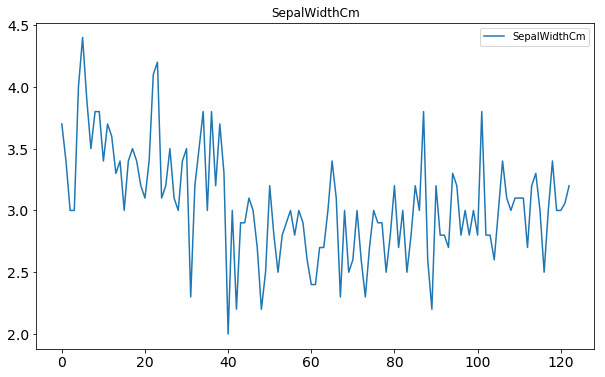

In [186]:
#將SepalWidthCm空值補平均數
train[['SepalWidthCm']] = train[['SepalWidthCm']].fillna(np.mean(train[['SepalWidthCm']]))
train.plot(kind='line',y='SepalWidthCm',figsize=(10,6),fontsize=14,title='SepalWidthCm')

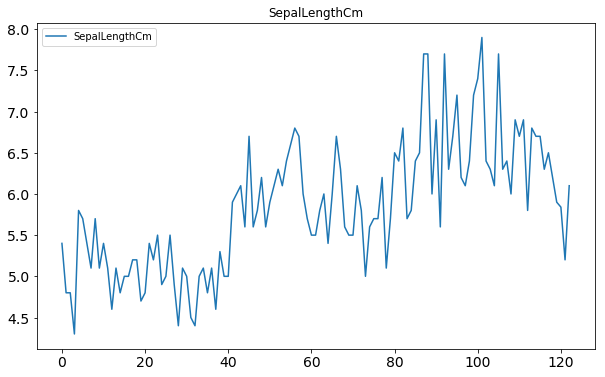

In [187]:
#將SepalLengthCm空值補平均數
train[['SepalLengthCm']] = train[['SepalLengthCm']].fillna(np.mean(train[['SepalLengthCm']]))
train.plot(kind='line',y='SepalLengthCm',figsize=(10,6),fontsize=14,title='SepalLengthCm')

In [188]:
#查看補完後的資料數
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 7 columns):
id               123 non-null int64
SepalLengthCm    123 non-null float64
SepalWidthCm     123 non-null float64
PetalLengthCm    123 non-null float64
PetalWidthCm     123 non-null float64
Species          123 non-null object
type             123 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 6.8+ KB


# 使用seaborn畫分布圖與各類圖型

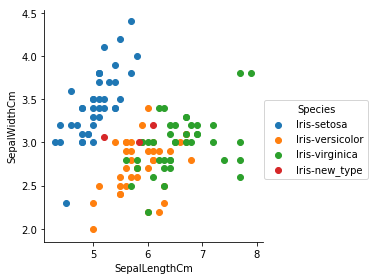

In [189]:
#畫出Species關聯圖
sns.FacetGrid(train, hue="Species", size=4).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend();
plt.show();

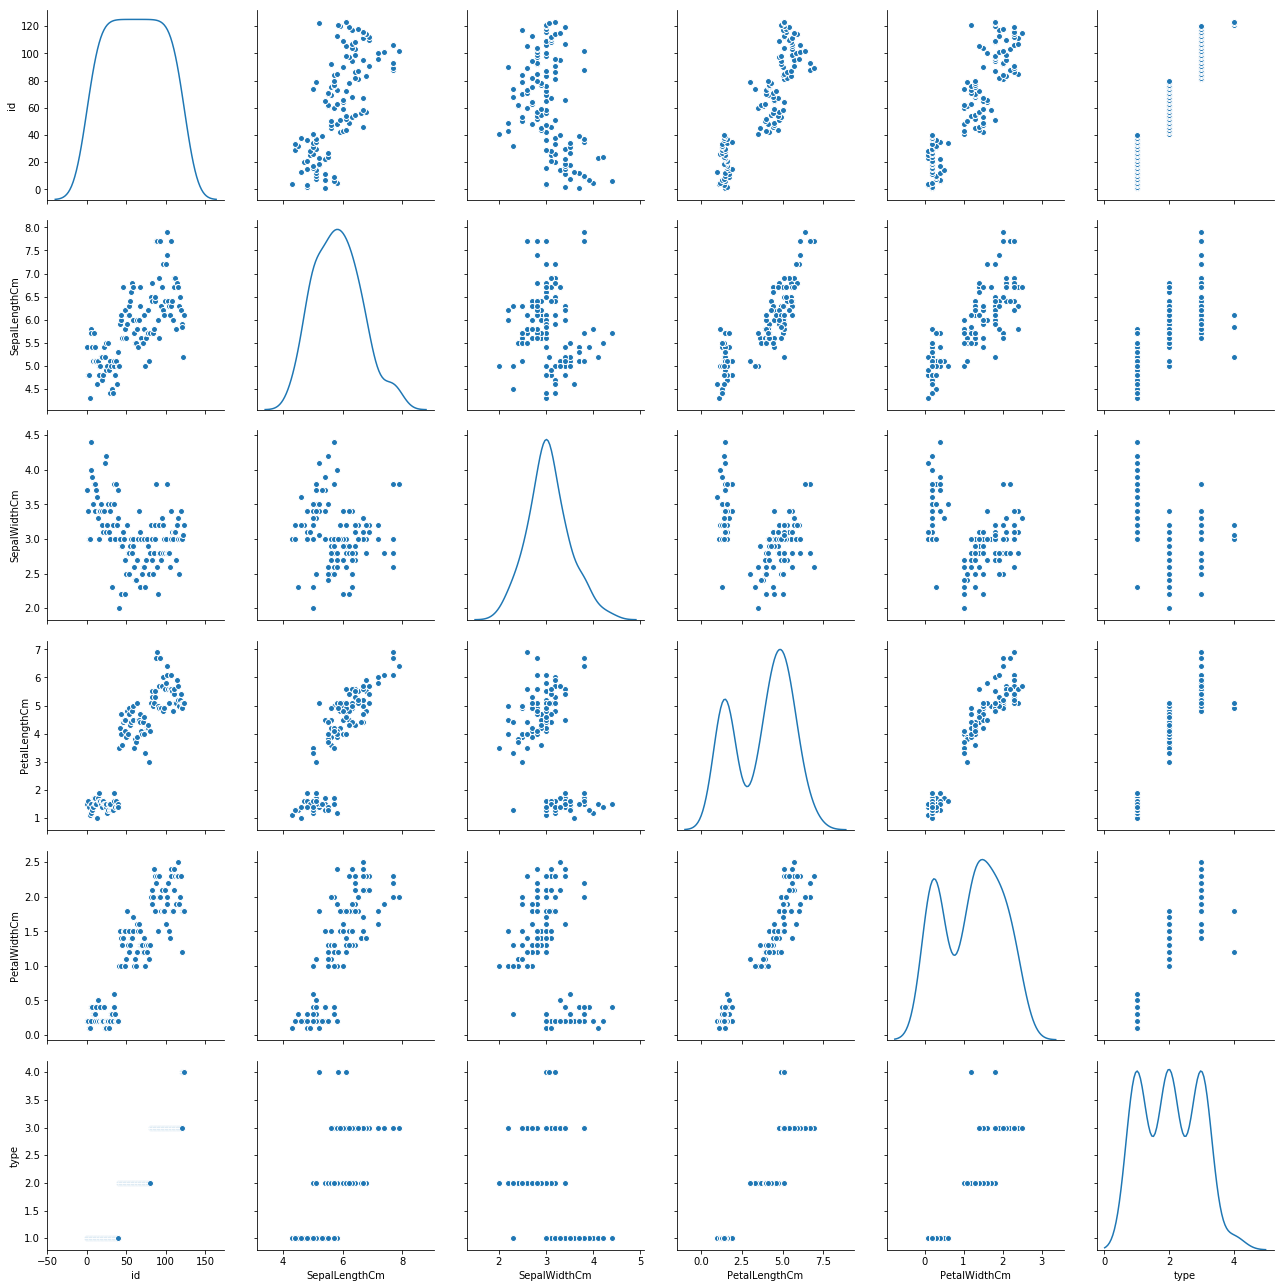

In [190]:
#畫分布圖
sns.pairplot(train,  size=3, diag_kind="kde");
plt.show()

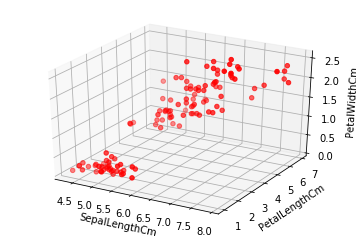

In [191]:
#3d圖形
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

x=train["SepalLengthCm"]
y=train["PetalLengthCm"]
z=train["PetalWidthCm"]

#color=("Iris-setosa", "Iris-virginica", "Iris-versicolor")
#color=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
ax.scatter(x,y,z,c='r',marker='o');

ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('PetalLengthCm')
ax.set_zlabel('PetalWidthCm')

plt.show()

In [192]:
#進行資料的運算，包含標準差 ,平均值等
train.describe()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,type
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,62.000000,5.840164,3.058197,3.764228,1.204878,2.048780
std,35.651087,0.787678,0.443503,1.731536,0.754425,0.867006
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,31.500000,5.200000,2.800000,1.600000,0.300000,1.000000
50%,62.000000,5.800000,3.000000,4.300000,1.300000,2.000000
75%,92.500000,6.350000,3.300000,5.100000,1.800000,3.000000
max,123.000000,7.900000,4.400000,6.900000,2.500000,4.000000


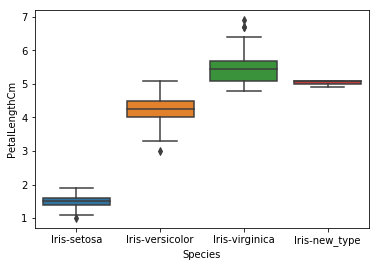

In [193]:
#Species與PetalLengthCm對應方盒圖
sns.boxplot(x='Species',y='PetalLengthCm', data=train)
plt.show()

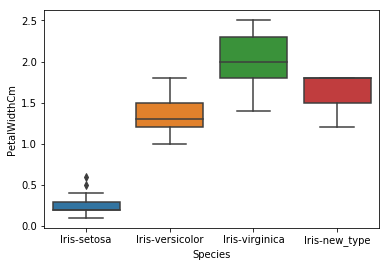

In [194]:
#Species與PetalWidthCm對應方盒圖
sns.boxplot(x='Species',y='PetalWidthCm', data=train)
plt.show()

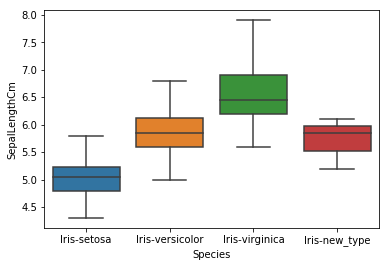

In [195]:
#Species與SepalLengthCm對應方盒圖
sns.boxplot(x='Species',y='SepalLengthCm', data=train)
plt.show()

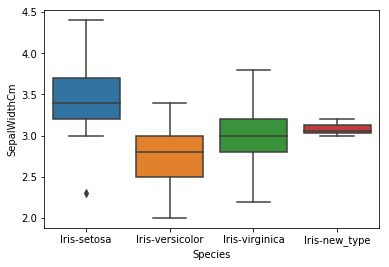

In [196]:
#Species與SepalWidthCm對應方盒圖
sns.boxplot(x='Species',y='SepalWidthCm', data=train)
plt.show()

# 切分資料

In [197]:
#將type 4, 資料去除, 以免干擾建模
train = train[train['type']!=4]

In [198]:
#使用train_test_split方法切分資料
from sklearn.model_selection import train_test_split

X = train[['SepalWidthCm','SepalLengthCm','PetalWidthCm','PetalLengthCm']]
y = train['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

# SVM模型

In [204]:
#從sklearn裡面import SVC
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel="linear", probability=True)
svc.fit(X_train, y_train)

#印出svm預測結果
print(metrics.classification_report(y_test, svc.predict(X_test)))
print(metrics.confusion_matrix(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       1.00      1.00      1.00        10
          3       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        36

[[14  0  0]
 [ 0 10  0]
 [ 0  0 12]]


# 將測試資料及導入並做預測

In [200]:
 #將test資料拉出來做預測
pred = svc.predict(test[['SepalWidthCm','SepalLengthCm','PetalWidthCm','PetalLengthCm']])

In [201]:
#印出預測結果
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3])

In [202]:
# 產生Submission File 以csv格式匯出
SVMSubmission = pd.DataFrame({ 'id': submission.id, 'type': pred })
SVMSubmission.to_csv("submission.csv", index=False)

In [203]:
#將產生出來的結果讀入並印出
submission = pd.read_csv('submission.csv', encoding = "utf-8", dtype = {'type': np.int32})
submission

,id,type
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1
